In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("HR_comma_sep.csv")

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
d=df.drop(["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","promotion_last_5years"],axis="columns")

In [6]:
d

,left,Department,salary
0,1,sales,low
1,1,sales,medium
2,1,sales,medium
3,1,sales,low
4,1,sales,low
...,...,...,...
14994,1,support,low
14995,1,support,low
14996,1,support,low
14997,1,support,low


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
d.Department=le.fit_transform(d.Department)
d.salary=le.fit_transform(d.salary)

In [10]:
d

,left,Department,salary
0,1,7,1
1,1,7,2
2,1,7,2
3,1,7,1
4,1,7,1
...,...,...,...
14994,1,8,1
14995,1,8,1
14996,1,8,1
14997,1,8,1


In [11]:
x=d.drop(["left"],axis='columns')

In [ ]:
x1=x.drop(["Department"],axis="columns")

In [12]:
y=d.left

In [13]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [14]:
y.describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
x1

In [ ]:
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.3)

In [17]:
x_train.shape

(10499, 2)

In [18]:
y_train.shape

(10499,)

In [19]:
x_test.shape

(4500, 2)

In [20]:
y_test.shape

(4500,)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model=LogisticRegression()

In [23]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.fit(x1_train,y_train)

In [ ]:
model.predict(x1_test)

In [ ]:
model.score(x1,y)

In [24]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
y_test

14812    1
6232     0
6627     0
2883     0
9287     0
        ..
14102    0
9892     0
9717     0
9044     0
7614     0
Name: left, Length: 4500, dtype: int64

In [26]:
model.score(x_test,y_test)

0.768

In [27]:
x

,Department,salary
0,7,1
1,7,2
2,7,2
3,7,1
4,7,1
...,...,...
14994,8,1
14995,8,1
14996,8,1
14997,8,1


In [29]:
import seaborn as sns

C:\Users\sakil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

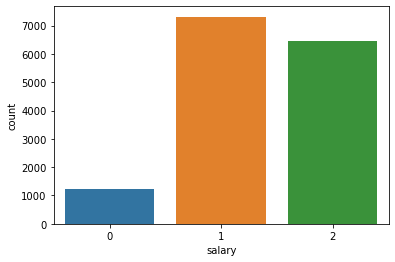

In [30]:
sns.countplot(x['salary'])

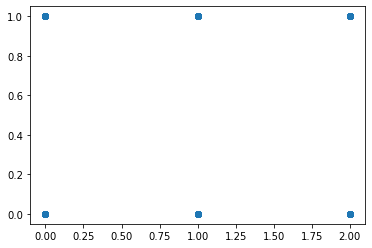

In [31]:
plt.scatter(x["salary"],y)
